In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sys

In [3]:
sys.path.append('../cfg')
from cfg.database_cfg import cfg

In [33]:
EDITING=False

In [229]:
con = create_engine('mysql://%s@%s/%s?charset=%s&use_unicode=%s&passwd=%s' % (cfg.user, cfg.host, cfg.dbname+'_prepped', cfg.charset, cfg.use_unicode, cfg.passwd), pool_recycle=3600)
climbdf = pd.read_sql("SELECT * from climb_prepped", con, index_col='index')
areadf = pd.read_sql("SELECT * from area_prepped", con, index_col='index')
climberdf = pd.read_sql("SELECT * from climber_prepped", con, index_col='index')
tickdf = pd.read_sql("SELECT * from ticks_prepped", con, index_col='index')
commentdf = pd.read_sql("SELECT * from comments_prepped", con, index_col='index')
gradedf = pd.read_sql("SELECT * from grades_prepped", con, index_col='index')
stardf = pd.read_sql("SELECT * from stars_prepped", con, index_col='index')
hitsdf = pd.read_sql("SELECT * from hits_prepped", con, index_col='index')


In [243]:
def cluster(df, colname, clustertype='kmeans', k=10):
    from sklearn.cluster import KMeans, AffinityPropagation
    matrix=df[[col for col in df.columns if col != colname]].values
    labels=df[colname].values
    if clustertype=='affinity':
        clf=AffinityPropagation()
    elif clustertype=="kmeans":
        clf=KMeans(n_clusters=k)
    clusters=clf.fit_predict(matrix)
    return pd.DataFrame(data={colname:labels,'cluster':clusters})

In [260]:
termsdf=climbdf[['avgstars']+cols].dropna()
x=cluster(termsdf, 'avgstars', clustertype='kmeans', k=10)
x['climbid']=termsdf.index

In [262]:
x.groupby('cluster').mean()['avgstars']

cluster
0    2.075571
1    2.221476
2    2.343001
3    2.305195
4    2.166466
5    2.296568
6    2.480556
7    2.224961
8    2.378545
9    1.996402
Name: avgstars, dtype: float64

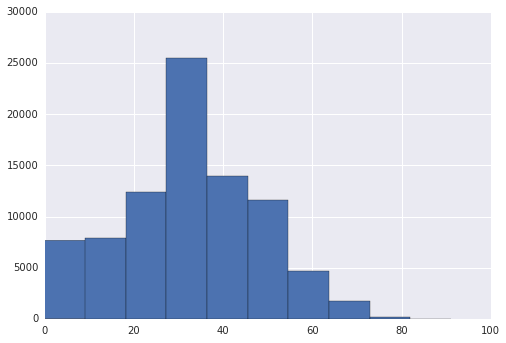

In [234]:
climbdf.loc[x['climbid'].values].numerizedgrade.hist()

In [236]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(climbdf[cols][:50])

KeyboardInterrupt: 

KeyboardInterrupt: 

In [195]:
temp=climbdf[cols[:50]][:50000]

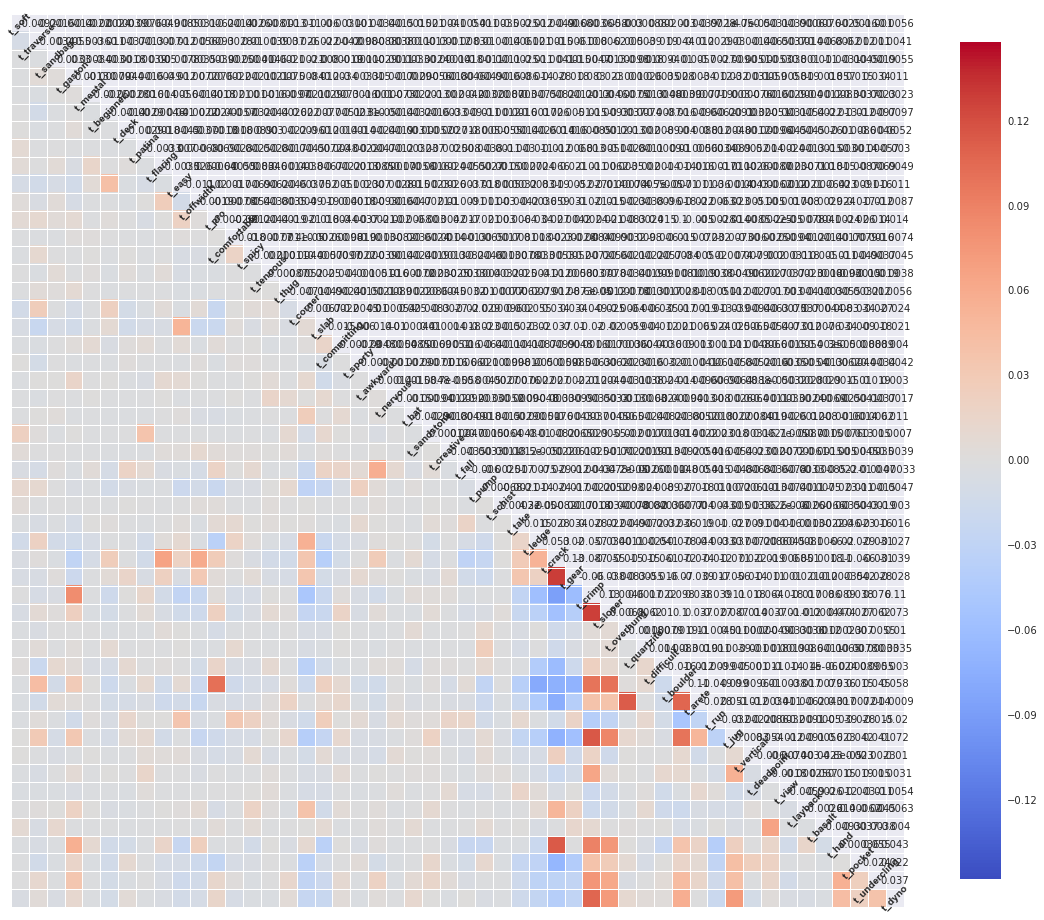

In [236]:
import seaborn as sns
f,ax=plt.subplots(figsize=[20,20])
sns.corrplot(climbdf[cols[:50]][:50000], ax=ax, sig_stars=False, annot=True)

In [237]:
cols=[col for col in climbdf.columns if 't_' in col]
corrmat=climbdf[cols].corr()

In [242]:
indices=corrmat['t_run'].index
corrmatches=corrmat['t_run'].values
sims=list(np.argsort(corrmatches))
print ', '.join(indices[sims[:10]])
sims.reverse()
print ', '.join(indices[sims[:10]])

t_boulder, t_crimp, t_hand, t_arete, t_jug, t_sloper, t_sidepull, t_pocket, t_dyno, t_pinch
t_run, t_protect, t_easy, t_comfortable, t_gear, t_exciting, t_slab, t_rust, t_spicy, t_fall


In [176]:
','.join(climbdf.columns)

u'name,climbid,area,description,grade,fa,protection,locationdescrip,pitch,style,url,length,avgstars,pageviews,submittedby,urlname,numerizedgrade,numgrade,lettergrade,areaid_x,region,mainarea,areaid_y,area_name,extracted_avgstars,computed_avgstars,roundedstars,starcounts,starstd,t_soft,t_traverse,t_sandbag,t_gaston,t_mental,t_beginner,t_deck,t_patina,t_flaring,t_easy,t_offwidth,t_pro,t_comfortable,t_spicy,t_tenuous,t_thug,t_corner,t_slab,t_committing,t_sporty,t_awkward,t_nervous,t_bat,t_sandstone,t_creative,t_fall,t_pump,t_schist,t_take,t_ledge,t_crack,t_gear,t_crimp,t_sloper,t_overhung,t_quartzite,t_difficult,t_boulder,t_arete,t_run,t_jug,t_vertical,t_deadpoint,t_view,t_layback,t_basalt,t_hand,t_pocket,t_undercling,t_dyno,t_exciting,t_sketch,t_chimney,t_diahedral,t_wide,t_protect,t_sidepull,t_conglomerate,t_stiff,t_bulge,t_pinch,t_heelhook,t_ramp,t_limestone,t_flake,t_gneiss,t_tech,t_thin,t_toehook,t_swing,t_hung,t_crux,t_granite,t_steep,t_rust,t_finger,mainarea_name,region_name,areaid

In [131]:
import json
with open('cfg/apriori.json') as f:
    apriori=json.loads(f.read())
with open('cfg/attributes.json') as f:
    attributes=json.loads(f.read())

In [162]:
for df in [areadf, climbdf, climberdf]:
    print len(df)

22696
99251
80618


In [166]:
profiledf = pd.read_sql("SELECT * from user_profiles", con)

In [263]:
climberdf.name

index
0                            WAGbag
1                            fz6ray
2                           i i12 i
3                          e3 ez e1
4                       gznauzfvqbj
5                       Lacey Stone
6                          B-Phelps
7                         D. Carson
8                            K Ayer
9                          D.Starry
10                           A Ange
11                      k. riemondy
12                          O'Brine
13                       A. Hamiter
14                          C baker
15                        Odinwiski
16                    C. Marchbanks
17                          C. Hill
18                        cacorrell
19                     CAclimber123
20                          caclark
21                     Caitlin Rhea
22                  Caitlin quilter
23                          N Baker
24                     Caleb Hansen
25                          caleb h
26                 Caleb Fitzgerald
27                    

In [ ]:
[880.0, 880.0, 880.0, 1289.0, 1289.0, 880.0, 650.0, 613.0, 546.0, 613.0]

In [127]:
if EDITING:
    chunksize=1000
    areadf.to_sql('area_prepped', con, if_exists='replace', chunksize=chunksize)
    climberdf.to_sql('climber_prepped', con,if_exists='replace', chunksize=chunksize)
    tickdf.to_sql('ticks_prepped', con, if_exists='replace', chunksize=chunksize)
    commentdf.to_sql('comments_prepped', con, if_exists='replace', chunksize=chunksize)
    gradedf.to_sql('grades_prepped', con, if_exists='replace', chunksize=chunksize)
    stardf.to_sql('stars_prepped', con, if_exists='replace', chunksize=chunksize)
    hitsdf.to_sql('hits_prepped', con, if_exists='replace', chunksize=chunksize)
    climbdf.to_sql('climb_prepped', con, if_exists='replace', chunksize=chunksize)